<a href="https://colab.research.google.com/github/DreamTeamInc/Core-DS/blob/master/development/Core_Andrew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Path to 'sample_core_analysis_data_example' folder with folder name
path_to_data = 'drive/My Drive/ sample_core_analysis_data_example'

Mounted at /content/drive


# Initializing packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import cv2 as cv
import seaborn as sns

from PIL import Image
from skimage import exposure
from skimage import io

import sklearn
import warnings
warnings.filterwarnings('ignore')

## **Functions for getting data** 

In [3]:
def get_photo(data,i):
  return io.imread('drive/My Drive/ sample_core_analysis_data_example/photos/{}.jpeg'.format(data['photo_id'][i]))

def get_photo_by_id(data,id):
  return io.imread('drive/My Drive/ sample_core_analysis_data_example/photos/{}.jpeg'.format(id))

def get_mask(data, i):
    return np.load('drive/My Drive/ sample_core_analysis_data_example/matrixes/matrix_{}__{}.npz'.format(data['photo_id'][i], data['task_id'][i]))['data']

def get_json(data,i):
  with open(path_to_data + '/extra/extra_{}__{}.json'.format(data['photo_id'][i],data['task_id'][i])) as json_data:
    d = json.load(json_data)
    json_data.close()
  return d

## **Functions for displaying data**


In [4]:
def show_image(image,nrows=1,ncols=1,cmap='gray'):
  fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
  ax.imshow(image)
  ax.axis('off')
  return fig, ax

def show_all_photo_data(data,i):
  print(data.iloc[i])
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
  ax1.imshow(get_photo(data, i))
  
  mask = get_mask(data,i)
  cmap = plt.get_cmap('tab20b', np.max(mask) + 1)
  mask = ax2.imshow(mask, cmap=cmap,vmin=-0.5, vmax=np.max(get_mask(data, i))+0.5)
  ax2.axis('off')
  fig.colorbar(mask, ticks=np.arange(0, np.max(get_mask(data, i))+1))
  return fig, (ax1, ax2)

def show_photo_series(data, column, value):
    fig, ax_ar = plt.subplots(1, 10, figsize=(14, 14))
    filt_data = data[data[column] == value]
    i = np.random.randint(0, filt_data.shape[0])
    for ax in ax_ar:
        filt_by_photo = filt_data[filt_data['photo_id'] == filt_data['photo_id'].iloc[i]]
        segments = filt_by_photo['segment_num'].values
        photo = get_photo(data, filt_by_photo.index.values[0])
        mask = get_mask(data, filt_by_photo.index.values[0])
        for value in segments:
            mask = np.ma.masked_where(mask == value, mask)
        
        ax.imshow(photo)
        ax.imshow(mask)
        ax.axis('off')
        filt_data.drop(filt_by_photo.index.values, axis=0, inplace=True)
        i = np.random.randint(0, filt_data.shape[0])
    
    return fig, ax_ar

# **Preprocessing**

In [5]:
all_data = pd.read_csv(path_to_data + '/data.csv')

In [6]:
uv_data = all_data[all_data['photo_type'] == 'УФ']
uv_data.reset_index(inplace = True, drop = True)

# **Machine Learning**

In [ ]:
features = pd.read_csv('drive/My Drive/data/best_features.csv')

In [ ]:
y = uv_data['segment_value']
#y = uv_data['segment_value'][:500]

## **SVM**

In [ ]:
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV


parametrs = {'kernel':('linear', 'rbf'), 'C':[1, 10],'degree':[3,4,5,6,7,8],
             'tol':[1e-3,1e-4,5e-4]}
svc = svm.SVC()

clf = GridSearchCV(svc,parametrs)


clf.fit(X_train,y_train)

clf.best_params_

In [ ]:
from sklearn import svm, metrics
from sklearn.model_selection import cross_validate


classifier = svm.SVC(C=10,degree=3,kernel='rbf',tol=0.01)

scores = cross_validate(classifier, features, y, scoring='f1_macro')

sum(scores['test_score'])/5

0.8409187366682789

## **RandomForestClassifier**

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, shuffle=False)


parametrs = {'n_estimators' : [320,330,340],'random_state' : [0],
             'criterion':['gini', 'entropy']}

rfc = RandomForestClassifier()

clf = GridSearchCV(rfc,parametrs)


clf.fit(X_train,y_train)

clf.best_params_

{'criterion': 'gini', 'n_estimators': 320, 'random_state': 0}

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate


forest = RandomForestClassifier(criterion='entropy',random_state=0)



scores = cross_validate(forest, features, y, scoring='f1_macro')

sum(scores['test_score'])/5

0.8793935042474994

In [ ]:
scores = cross_val_score(forest, X_test, y_test, cv=5)
scores

NameError: ignored

## **ExtraTrees**

In [ ]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, shuffle=False)


parametrs = {'n_estimators' : [3,10,30,40,50,100,150,200],'max_features':[2,4,6,8],'random_state' : [0],
             'criterion':['gini', 'entropy'], 'min_samples_split' : [2,3,4], 'min_samples_leaf' : [1,2,3],'ccp_alpha' : [0.0, 1,2],}



etc = ExtraTreesClassifier()

clf = GridSearchCV(etc,parametrs)


clf.fit(X_train,y_train)

clf.best_params_

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import  metrics
from sklearn.model_selection import cross_validate

etc = ExtraTreesClassifier(criterion= 'gini',min_samples_split= 3,warm_start = True)

scores = cross_validate(etc, features, y, scoring='f1_macro')

sum(scores['test_score'])/5

0.8858971581874627

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features,y,test_size=0.33)

etc.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=3,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=True)

In [ ]:
from incremental_trees.models.classification.streaming_extc import StreamingEXTC
from sklearn import  metrics
from sklearn.model_selection import cross_validate

k = StreamingEXTC(criterion= 'gini',min_samples_split= 3)

scores = cross_validate(k, features, y, scoring='f1_macro')

sum(scores['test_score'])/5

0.7276497164625333

## **3-chanel histogram with equalization**

In [ ]:
def histogram_equalize(img): 
    img_cdf, bin_centers = exposure.cumulative_distribution(img) 
    return np.interp(img, bin_centers, img_cdf)

In [ ]:
def get_features(photo,mask,segment_num):
  # Get segment from photo
  p1 = np.ma.masked_where(mask == segment_num, photo[:,:,0])
  p2 = np.ma.masked_where(mask == segment_num, photo[:,:,1])
  p3 = np.ma.masked_where(mask == segment_num, photo[:,:,2])
  # Get histograms 3 chanels of photo
  hist1 = np.histogram(p1.mask * p1.data, bins = 32, range = (0,1))
  hist2 = np.histogram(p2.mask * p2.data, bins = 32, range = (0,1))
  hist3 = np.histogram(p3.mask * p3.data, bins = 32, range = (0,1))
  
  features = np.concatenate((np.array(hist1[0][1:] / np.sum(p1.mask),dtype=object),
                             np.array(hist2[0][1:] / np.sum(p2.mask),dtype=object),
                             np.array(hist3[0][1:] / np.sum(p3.mask),dtype=object)))
  return features

In [ ]:
from skimage.color import rgb2hsv

def data_preprocessing(data):
  features_arr = []
  for i in range(data.shape[0]):
    segment_num = data['segment_num'].iloc[i]
    photo = get_photo(data,i)
    mask = get_mask(data,i)

    hsv_features = get_features( rgb2hsv(photo),mask,segment_num) 
    rgb_features = get_features(histogram_equalize(photo),mask,segment_num)
    
    photo_features = np.concatenate((hsv_features,rgb_features))         
    features_arr.append(list(photo_features))
    features = pd.DataFrame(features_arr)


  return features_arr


## **Selection of important features**

In [ ]:
features = pd.read_csv('drive/My Drive/data/best_features.csv')

In [ ]:
etc.fit(features,y)

importances = etc.feature_importances_
std = np.std([tree.feature_importances_ for tree in etc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


main_features = []
for f in range(features.shape[1]):
    main_features.append(indices[f])


f = []
for i in range(50,len(main_features)):
  f.append(main_features[i])


for i in range(len(f)):
  features.drop(str(f[i]),axis='columns', inplace=True)

In [ ]:
np.save('not_importance_features.npy',f)

In [ ]:
features.to_csv('features.csv',index=False)


# **Segmentation**

In [ ]:
from skimage.color import rgb2hsv
from collections import OrderedDict

def photo_preprocessing(photo,mask):
  features_arr = []
  unique_segments = list(OrderedDict.fromkeys(mask.ravel()))
  for i in unique_segments:
    hsv_features = get_features( rgb2hsv(photo),mask,i) 
    rgb_features = get_features(histogram_equalize(photo),mask,i)
    photo_features = np.concatenate((hsv_features,rgb_features))         
    features_arr.append(list(photo_features))
    features = pd.DataFrame(features_arr)

  return features

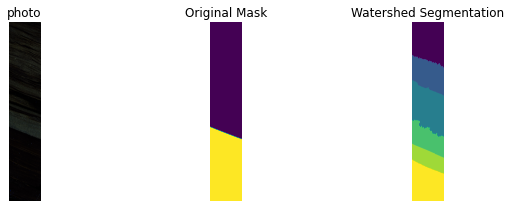

In [ ]:
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy import ndimage
from skimage.color import rgb2hsv,rgb2gray
from skimage import filters

p = 0
photo = get_photo(uv_data,p)
mask = get_mask(uv_data,p)

labels = watershed(rgb2gray(photo),markers=12)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(photo)
ax[0].set_title('photo')
ax[1].imshow(mask)
ax[1].set_title('Original Mask')
ax[2].imshow(labels)
ax[2].set_title('Watershed Segmentation')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

In [ ]:
from collections import OrderedDict
def predicted_segmentation(predicts,mask):
  labels_uniq = list(OrderedDict.fromkeys(mask.ravel()))

  for i in range(predicts.shape[0]):
    if predicts[i] == 'Отсутствует':
      mask = np.where(mask == labels_uniq[i],100,mask)
    if predicts[i] == 'Насыщенное':
      mask = np.where(mask == labels_uniq[i],200,mask)
    if predicts[i] == 'Карбонатное':
      mask = np.where(mask == labels_uniq[i],300,mask)
  return mask

In [ ]:
def test_segmentataion(data,mask):
  b = data[['segment_num','segment_value']].groupby('segment_value',as_index=False)
  b_keys = b.indices.keys()
  for i in b_keys:
    segment_keys = b.indices[i]
    for j in segment_keys:
      if i == 'Отсутствует':
        mask = np.where(mask == j,100,mask)
      if i == 'Насыщенное':
        mask = np.where(mask == j,200,mask)
      if i == 'Карбонатное':
        mask = np.where(mask == j,300,mask)
  return mask

In [ ]:
features = pd.read_csv('drive/My Drive/data/features.csv')
y = uv_data['segment_value']
etc = ExtraTreesClassifier(criterion= 'gini',min_samples_split= 3)
X_train,X_test,y_train,y_test = train_test_split(features,y,test_size=0.33)

etc.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=3,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
from skimage.metrics import normalized_root_mse
from skimage.segmentation import slic
from sklearn.metrics import f1_score
def segmentation_metric(data):
  result = []
  k = 0
  for i in data['photo_id'].unique()[:10]:
    photo_data = data[data['photo_id'] == i]
    photo_data.reset_index(inplace = True, drop = True)
    photo = get_photo(photo_data,0)
    mask = get_mask(photo_data,0)
    photo_data.reset_index(inplace = True, drop = True)
    test_mask = watershed(rgb2gray(photo),markers=12)
    #test_mask = slic(photo, n_segments=17)

    features = photo_preprocessing(photo,test_mask)
    features = pd.DataFrame(features)
    for i in range(len(f)):
      features.drop(f[i],axis='columns', inplace=True)
    
    print(k)
    k=k+1
    predicts = etc.predict(features)
    test_mask = predicted_segmentation(predicts,test_mask)
    true_mask =  test_segmentataion(photo_data,mask) 
    result.append(normalized_root_mse(test_mask,true_mask))
  return result


In [ ]:
result = segmentation_metric(uv_data)

In [ ]:
sum(result)/10

0.22242965408445164

## **K-means**

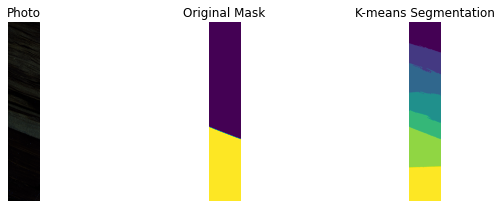

In [ ]:
from skimage.segmentation import slic
from skimage import filters
from scipy import ndimage
from skimage.color import rgb2gray
from skimage.color import rgb2hsv

s = 0
photo = get_photo(uv_data,s)
mask = get_mask(uv_data,s)


labels = slic(photo, n_segments=10)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(photo)
ax[0].set_title('Photo')
ax[1].imshow(mask)
ax[1].set_title('Original Mask')
ax[2].imshow(labels)
ax[2].set_title('K-means Segmentation')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

# **Wrapping the model in a class**

In [12]:
from sklearn.model_selection import train_test_split
from skimage.segmentation import watershed
from scipy import ndimage
from sklearn.ensemble import ExtraTreesClassifier
from skimage.color import rgb2hsv,rgb2gray
from collections import OrderedDict
from skimage import exposure
from skimage import io
import pickle 
from joblib import dump, load
import json

path_to_data = 'drive/My Drive/'

class UV_Model(object):
  
  def __init__(self,model=None):
    if model == None:
      self.features = pd.read_csv(path_to_data + 'data/features.csv')
      self.y = uv_data['segment_value']
      self.etc = ExtraTreesClassifier(criterion='gini',min_samples_split=3) #warm_start=True
      self.etc.fit(self.features,self.y)
    else:
      self.etc = load(model)    

  def __histogram_equalize(self,img): 
    img_cdf, bin_centers = exposure.cumulative_distribution(img) 
    return np.interp(img, bin_centers, img_cdf)

  def __get_features(self,photo,mask,segment_num):
    # Get segment from photo
    p1 = np.ma.masked_where(mask == segment_num, photo[:,:,0])
    p2 = np.ma.masked_where(mask == segment_num, photo[:,:,1])
    p3 = np.ma.masked_where(mask == segment_num, photo[:,:,2])
    # Get histograms 3 chanels of photo
    hist1 = np.histogram(p1.mask * p1.data, bins = 32, range = (0,1))
    hist2 = np.histogram(p2.mask * p2.data, bins = 32, range = (0,1))
    hist3 = np.histogram(p3.mask * p3.data, bins = 32, range = (0,1))
    
    features = np.concatenate((np.array(hist1[0][1:] / np.sum(p1.mask),dtype=object),
                              np.array(hist2[0][1:] / np.sum(p2.mask),dtype=object),
                              np.array(hist3[0][1:] / np.sum(p3.mask),dtype=object)))
    return features

  def __segment_preprocessing(self,photo,mask,segment_num):
    hsv_features = self.__get_features(rgb2hsv(photo),mask,segment_num) 
    rgb_features = self.__get_features(self.__histogram_equalize(photo),mask,segment_num)      
    vector = np.concatenate((hsv_features,rgb_features))
    return vector 

  def __get_important_features(self,features):
    discarded_features = np.load(path_to_data + 'data/not_importance_features.npy')
    for i in range(len(discarded_features)):
      features.drop(discarded_features[i],axis='columns', inplace=True)
    return features

  def __photo_preprocessing(self,photo,mask,json_data=None):
    features_arr = []
    if json_data == None:
      unique_segments = list(OrderedDict.fromkeys(mask.ravel()))
    else: 
      unique_segments = list(map(int,json_data.keys()))
      y = []
    for i in unique_segments:
      vector = self.__segment_preprocessing(photo,mask,i)        
      features_arr.append(list(vector))
      if json_data != None:
        y.append(json_data[str(i)])

    features = pd.DataFrame(features_arr)
    features = self.__get_important_features(features)
    if json_data != None:
      y = pd.Series(y)
      features['y'] = y

    return features

  
  def __to_semantic_segmentation(self,mask,predicts):
    labels_uniq = list(OrderedDict.fromkeys(mask.ravel()))

    for i in range(predicts.shape[0]):
      if predicts[i] == 'Отсутствует':
        mask = np.where(mask == labels_uniq[i],100,mask)
      if predicts[i] == 'Насыщенное':
        mask = np.where(mask == labels_uniq[i],200,mask)
      if predicts[i] == 'Карбонатное':
        mask = np.where(mask == labels_uniq[i],300,mask)
    return mask

  def predict(self,photo):
    mask = watershed(rgb2gray(photo),markers=12)
    photo_features = self.__photo_preprocessing(photo,mask)
    predicts = self.etc.predict(photo_features)
    semantic_seg = self.__to_semantic_segmentation(mask,predicts)
    return semantic_seg

  def retrain(self,photos,masks,jsons):
    for i in range(len(photos)):
      photo = photos[i]
      mask = masks[i]
      json_data = jsons[i]
      features = self.__photo_preprocessing(photo,mask,json_data)
      y = features['y']
      features.drop(['y'],axis='columns', inplace=True)
      #self.etc.fit(features,y)
      for i in range(features.shape[0]):
        self.features.loc[self.features.shape[0]] = features.loc[i].tolist()
        self.y.loc[self.y.shape[0]] = y.loc[i]
    self.etc.fit(self.features,self.y)
  


  def save_model(self,name):
    dump(self.etc,name) 


In [13]:
obj = UV_Model()
#photo = get_photo(uv_data,0)
#predict = obj.predict(photo)
#plt.imshow(predict)

In [14]:
photo = get_photo(uv_data,1500)
mask = get_mask(uv_data,1500)

data = {
    "0" :"Насыщенное",
    "1" :"Насыщенное",
    "2" :"Насыщенное",
    "3" :"Насыщенное",
    "4" :"Насыщенное",
}
json_data = json.dumps(data)
js = json.loads(json_data)



In [15]:
photo2 = get_photo(uv_data,1500)
mask2 = get_mask(uv_data,1500)

data2 = {
    "0" :"Насыщенное",
    "1" :"Насыщенное",
    "2" :"Насыщенное",
    "3" :"Насыщенное",
    "4" :"Насыщенное",
}
json_data2 = json.dumps(data2)
js2 = json.loads(json_data2)

photos = []
photos.append(photo)
photos.append(photo2)

masks = []
masks.append(mask)
masks.append(mask2)

jsons = []
jsons.append(js)
jsons.append(js2)


obj.retrain(photos,masks,jsons)

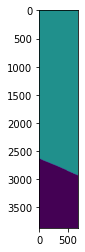

In [16]:
photo = get_photo(uv_data,1500)
predict = obj.predict(photo)
plt.imshow(predict)

In [ ]:
type(get_photo(uv_data,0))

numpy.ndarray